In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("zomato.csv",encoding='latin1')

##### 
2

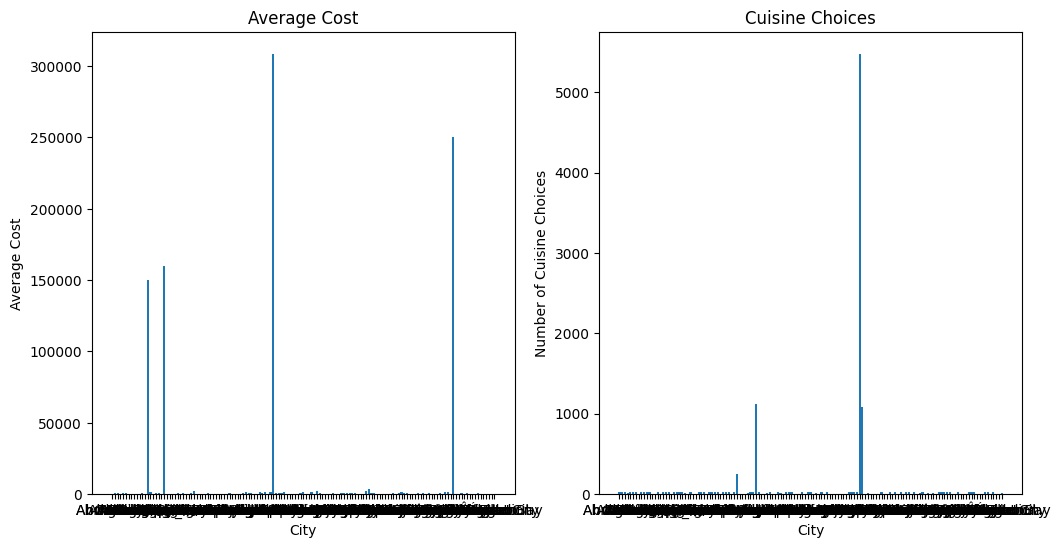

In [14]:

city_stats = df.groupby('City').agg({
    'Average Cost for two': 'mean',
    'Cuisines': 'count'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(city_stats['City'], city_stats['Average Cost for two'])
plt.xlabel('City')
plt.ylabel('Average Cost')
plt.title('Average Cost')

plt.subplot(1, 2, 2)
plt.bar(city_stats['City'], city_stats['Cuisines'])
plt.xlabel('City')
plt.ylabel('Number of Cuisine Choices')
plt.title('Cuisine Choices')

plt.show()




### 3 correlation between location and its rating

In [15]:
correlation_matrix = df[['Longitude', 'Latitude', 'Aggregate rating']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  Longitude  Latitude  Aggregate rating
Longitude          1.000000  0.043207         -0.116818
Latitude           0.043207  1.000000          0.000516
Aggregate rating  -0.116818  0.000516          1.000000


#### 4 rating wrt months

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['Rating'].mean()

print("Average Ratings:")
print(monthly_avg)


#### 5 more rating and less cost

In [16]:
filtered_restaurants = df[(df['Aggregate rating'] >= 4.5) & (df['Average Cost for two'] <= 500)]


In [17]:
filtered_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
39,6600427,Coco Bambu,30,Brasí_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Brasí_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30
43,7304307,Confeitaria Colombo,30,Rio de Janeiro,"Rua Goní_alves Dias, 32, Centro, Rio de Janeiro",Centro,"Centro, Rio de Janeiro",-43.178826,-22.905293,"Desserts, Cafe",...,Brazilian Real(R$),No,No,No,No,4,4.8,Dark Green,Excellent,29
44,7301215,Bibi,30,Rio de Janeiro,"Rua Santa Clara, 36, Copabana, Rio de Janeiro",Copacabana,"Copacabana, Rio de Janeiro",-43.186692,-22.972072,"Juices, Healthy Food",...,Brazilian Real(R$),No,No,No,No,3,4.7,Dark Green,Excellent,24
45,7300596,Cervantes,30,Rio de Janeiro,"Avenida Prado Junior, 335 B, Copacabana, Rio d...",Copacabana,"Copacabana, Rio de Janeiro",-43.175833,-22.962167,"Beverages, Bar Food, Fast Food",...,Brazilian Real(R$),No,No,No,No,3,4.5,Dark Green,Excellent,29
47,7300704,TT Burger,30,Rio de Janeiro,"Galeria River, Rua Francisco Otaviano, 67, Cop...","Galeria River, Copacabana","Galeria River, Copacabana, Rio de Janeiro",-43.191000,-22.986833,Burger,...,Brazilian Real(R$),No,No,No,No,3,4.8,Dark Green,Excellent,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,5904116,J'adore Chocolatier,208,ÛÁstanbul,"AsmalÛ±mescit Mahallesi, ÛÁstiklal Caddesi, Em...",AsmalÛ±mescit,"AsmalÛ±mescit, ÛÁstanbul",28.976127,41.033002,Desserts,...,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1311
9538,5901782,Starbucks,208,ÛÁstanbul,"Bebek Mahallesi, Cevdetpaôa Caddesi, No 30/A,...",Bebek,"Bebek, ÛÁstanbul",29.043734,41.077696,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.9,Dark Green,Excellent,1042
9540,5927248,Draft Gastro Pub,208,ÛÁstanbul,"Caddebostan Mahallesi, BaÛôdat Caddesi, No 349...",Caddebostan,"Caddebostan, ÛÁstanbul",29.074116,40.963935,Bar Food,...,Turkish Lira(TL),No,No,No,No,4,4.9,Dark Green,Excellent,522
9543,5916085,Dem Karakí_y,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, Hoca Ta...",Karakí_y,"Karakí_y, ÛÁstanbul",28.978237,41.024633,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761


#### 6--sentiment analysis

In [19]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Rating text'].apply(analyze_sentiment)

correlation = df['Sentiment'].corr(df['Aggregate rating'])

print("Corr betwn Sentiment and Rating:", correlation)


Corr betwn Sentiment and Rating: 0.5279547806197544


In [21]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [26]:

positive_words = ['very Good', 'excellent', 'good']
negative_words = ['average', 'poor', 'bad']

def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    
    words = text.lower().split()
    positive_keywords = [word for word in words if word in positive_words]
    negative_keywords = [word for word in words if word in negative_words]
    
    return sentiment, positive_keywords, negative_keywords

df['Sentiment'], df['Positive Keywords'], df['Negative Keywords'] = zip(*df['Rating text'].apply(analyze_sentiment))

print(df[['Rating text', 'Sentiment', 'Positive Keywords', 'Negative Keywords']])



     Rating text  Sentiment Positive Keywords Negative Keywords
0      Excellent       1.00       [excellent]                []
1      Excellent       1.00       [excellent]                []
2      Very Good       0.91            [good]                []
3      Excellent       1.00       [excellent]                []
4      Excellent       1.00       [excellent]                []
...          ...        ...               ...               ...
9546   Very Good       0.91            [good]                []
9547   Very Good       0.91            [good]                []
9548        Good       0.70            [good]                []
9549   Very Good       0.91            [good]                []
9550   Very Good       0.91            [good]                []

[9551 rows x 4 columns]


#### 7 online delivery impact on ratings

In [28]:

with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()

without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print("rating with online delivery:", with_delivery)
print("rating without online delivery:", without_delivery)

if with_delivery > without_delivery:
    print("Restaurants with online delivery are  rated higher.")
elif with_delivery < without_delivery:
    print("Restaurants with online delivery are rated lower.")
else:
    print("no impact")


rating with online delivery: 3.2488372093023257
rating without online delivery: 2.465295774647887
Restaurants with online delivery are  rated higher.


#### 8 locality with most cuisines

In [31]:
cuisine_count = df.groupby('Locality')['Cuisines'].apply(lambda x: len(set(str(x).split(', '))))
cuisine_count = cuisine_count.sort_values(ascending=False)

print(cuisine_count.head(10))


Locality
Punjabi Bagh                 60
Khan Market                  57
Cyber Hub, DLF Cyber City    54
Sector 29                    54
New Friends Colony           52
Kirti Nagar                  52
Sector 110                   50
Janakpuri                    49
Vijay Nagar                  49
Paschim Vihar                48
Name: Cuisines, dtype: int64


#### 9 restaurants with high ratings

In [35]:
chain_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean()
high_rating = 4.5  
popular_chains = chain_ratings[chain_ratings >= high_rating]
popular_chains

Restaurant Name
'Ohana                           4.500
22nd Parallel                    4.500
AB's - Absolute Barbecues        4.825
AB's Absolute Barbecues          4.850
Aconchego Carioca                4.600
                                 ...  
Zoeys Pizzeria                   4.700
Zolocrust - Hotel Clarks Amer    4.900
Zunzi's                          4.500
feel ALIVE                       4.700
sketch Gallery                   4.500
Name: Aggregate rating, Length: 250, dtype: float64

#### 10 votes vs rating

In [36]:
correlation = df['Votes'].corr(df['Aggregate rating'])
correlation

0.31369058419541146

#### 11 popularuty vs price

In [41]:
avg_votes_by_price = df.groupby("Average Cost for two")["Votes"].mean()
print("votes are :")
avg_votes_by_price


votes are :


Average Cost for two
0           80.111111
7           79.750000
10         311.875000
15          26.500000
20          98.600000
             ...     
300000     306.500000
350000     243.000000
450000     395.000000
500000     605.000000
800000    1185.500000
Name: Votes, Length: 140, dtype: float64

In [42]:
correlation = df["Average Cost for two"].corr(df["Votes"])
print("correlation:")
correlation

correlation:


0.06778324227149266

In [46]:
booking_vs_ratings = df.groupby("Has Table booking")["Aggregate rating"].mean()
booking_vs_ratings

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

In [44]:

delivery_vs_ratings = df.groupby("Has Online delivery")["Aggregate rating"].mean()
delivery_vs_ratings

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

#### 13 restaurant with low votes and high rating

In [47]:
lowest_votes= 100  
highest_rating = 4.5  

hidden_gems = df[(df['Votes'] < lowest_votes) & (df['Aggregate rating'] >= highest_rating)]

print("Restaurants are:")
print(hidden_gems)

Restaurants are:
      Restaurant ID                 Restaurant Name  Country Code  \
39          6600427                      Coco Bambu            30   
43          7304307             Confeitaria Colombo            30   
44          7301215                            Bibi            30   
45          7300596                       Cervantes            30   
47          7300704                       TT Burger            30   
48          7300955              Braseiro da Gíçvea            30   
49          7300521                      Balada Mix            30   
50          7300515               Garota de Ipanema            30   
51          7300483          Zazíç BistríÇ Tropical            30   
54          7300004                    Sushi Leblon            30   
59          7302898                      Aprazí_vel            30   
60          7302859               Aconchego Carioca            30   
62          6706313        Cantina Famiglia Mancini            30   
66          67004

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


X = df[['Cuisines','Longitude', 'Average Cost for two']] 
y = df['Aggregate rating']  

X = pd.get_dummies(X, columns=['Cuisines'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.9015233313316846
Mean Absolute Error: 1.1209792941112662
